# <center>Laboratorium 9<br>Metody Numeryczne</center>

Instrukcja:  
Na zajęciach należy wykonać poniższe zadania, a następnie sporządzić sprawozdanie zawierające odpowiedzi (w postaci kodu) z komentarzami w środowisku Jupyter Notebook i umieścić je na platformie e-learningowej.

***Materiały przygotowujące:***


In [2]:
import main
import numpy as np
import scipy 
import matplotlib
import matplotlib.pyplot as plt
import math


***Temat główny:***

Znajdź miejsca zerowe funkcji: 
$ 
f(x) = e^{-2x} + x^2 - 1 
$,

metodami:
* Bisekcji,
* Siecznych,
* Newtona

Funkcja i jej pochodne zostały zaimplementowane w *main.py*

***Zadanie 1.***  
Wykonaj wykres funckji oraz jej pierwszej i drugiej pochodnej (obliczonej analitycznie) na jednym rysunku w przedziale pozwalającym na zgrubne określenie miejsc zerowych. Wykres powinien być odpowiednio opisany. Określ przedział miejsca zerowego.

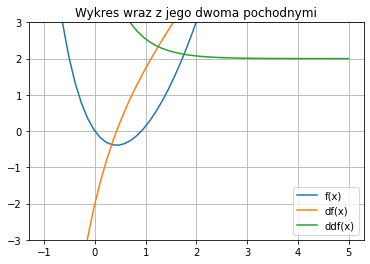

In [3]:
x = np.linspace(-1, 5)
plt.plot(x, main.fun(x))
plt.plot(x, main.dfun(x))
plt.plot(x, main.ddfun(x))
plt.grid()
plt.title('Wykres wraz z jego dwoma pochodnymi')
plt.legend(("f(x)", "df(x)", "ddf(x)"))
plt.ylim([-3, 3])
plt.show()

***Zadanie 2.***  
Zaimplementuj [metodę bisekcji](https://en.wikipedia.org/wiki/Bisection_method)

Gwarancja zbieżności:

1) funkcja jest ciągła na danym przedziale [a,b]

2) funkcja na końcach przedziału przyjmuje przeciwne znaki

***Zadanie 3.***  
Zaimplementuj [metodę siecznych](https://en.wikipedia.org/wiki/Secant_method)

Gwarancja zbieżności:

1) funkcja jest ciągła na danym przedziale [a,b]

2) Pierwsza i druga pochodna istnieją i są ciągłe w przedziale domkniętym [a,b]

3) funkcja na końcach przedziału przyjmuje przeciwne znaki

4) pierwsza i druga pochodna mają stały znak (brak eksremów lokalnych i punktów przegięcia)


***Zadanie 4.***  
Zaimplementuj [metodę Newtona](https://en.wikipedia.org/wiki/Newton%27s_method)

Gwarancja zbieżności:

1) funkcja jest ciągła na danym przedziale [a,b]

2) Pierwsza i druga pochodna istnieją i są ciągłe w przedziale domkniętym [a,b]

3) funkcja na końcach przedziału przyjmuje przeciwne znaki

4) pierwsza i druga pochodna mają stały znak (brak eksremów lokalnych i punktów przegięcia)


***Zadania 5.***  
Dla głównej funkcji z zadania 1 znajdź miejsca zerowe przy użyciu:

* funkcji root dostępnej w pakiecie scipy.optimize
* funkcji fsolve dostępnej w pakiecie scipy.optimize


In [4]:
from scipy import optimize
x_zer = optimize.root(main.fun, [0, 2])
x_zer.x

array([0.        , 0.91656258])

In [5]:
x_zer_2 = optimize.fsolve(main.fun, [0,1])
print(x_zer_2)

[0.         0.91656258]


***Zadanie 6.***  
Dla głównej funkcji oraz przedziału zdefiniowanego z zadania 1 znajdź miejsca zerowe przy użyciu:

* metody bisekcji
* metody siecznych
* metody Newtona

z tolerancją $10^{-10}$

Zbadaj dokładność(względem rozwiązania z zadania 5) i czas obliczeń metod w zależności od liczby iteracji. Wyniki przedstaw na wykresach. 

In [6]:
x_zer = main.bisection(0, 1, main.fun, 10e-10, 1)
print(x_zer)
print('jest ta metoda zdecydowanie mniej dokładna niż ta zastosowana w zadaniu 5')

(0.5, 1)
jest ta metoda zdecydowanie mniej dokładna niż ta zastosowana w zadaniu 5


33.9 µs ± 4.31 µs per loop (mean ± std. dev. of 3 runs, 5 loops each)
33.3 µs ± 3.42 µs per loop (mean ± std. dev. of 3 runs, 5 loops each)
32.2 µs ± 1.9 µs per loop (mean ± std. dev. of 3 runs, 5 loops each)
74.2 µs ± 22.8 µs per loop (mean ± std. dev. of 3 runs, 5 loops each)
32.4 µs ± 2.19 µs per loop (mean ± std. dev. of 3 runs, 5 loops each)


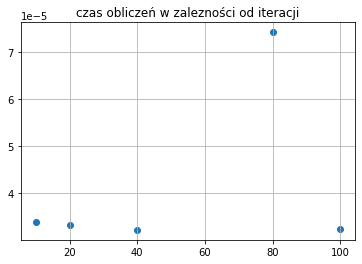

In [7]:
it = [10, 20, 40, 80, 100]
blad = []
t = []
for i in it:
    t1 = %timeit -r 3 -n 5 -o main.bisection(0, 1, main.fun, 10e-10, 1)
    t.append(t1.average)
    blad.append(t1.stdev)

plt.scatter(it, t)
plt.title("czas obliczeń w zalezności od iteracji")
plt.grid()
plt.show()

In [8]:
x_zer = main.secant(-0.5, 0.5, main.fun, 10e-10, 1)
print(x_zer)
x_zer_2 = main.secant(0.5, 1, main.fun, 10e-10, 1)
print(x_zer_2)
print('Ta metoda jest zdecydowanie bardziej dokładna, przy odpowiednim dobraniu zakresów')

(0.20283566087973698, 1)
(0.9132391279903154, 1)
Ta metoda jest zdecydowanie bardziej dokładna, przy odpowiednim dobraniu zakresów


11.8 µs ± 3.28 µs per loop (mean ± std. dev. of 3 runs, 5 loops each)
21.6 µs ± 4.25 µs per loop (mean ± std. dev. of 3 runs, 5 loops each)
11.6 µs ± 3.22 µs per loop (mean ± std. dev. of 3 runs, 5 loops each)
11.5 µs ± 3.15 µs per loop (mean ± std. dev. of 3 runs, 5 loops each)
12 µs ± 3.84 µs per loop (mean ± std. dev. of 3 runs, 5 loops each)


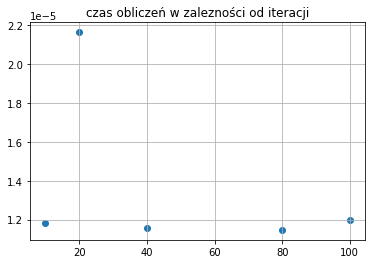

In [9]:
it = [10, 20, 40, 80, 100]
blad = []
t = []
for i in it:
    t1 = %timeit -r 3 -n 5 -o main.secant(0, 1, main.fun, 10e-10, 1)
    t.append(t1.average)
    blad.append(t1.stdev)

plt.scatter(it, t)
plt.title("czas obliczeń w zalezności od iteracji")
plt.grid()
plt.show()

In [17]:
x_zer = main.newton(main.fun, main.dfun, main.ddfun, -0.5, 0.2, 10e-10, i)
x_zer_2 = main.newton(main.fun, main.dfun, main.ddfun, 0.5, 1, 10e-10, i)
print(x_zer)
print(x_zer_2)

(-9.191619259508066e-11, 3)
(0.9165625831138303, 4)


65.8 µs ± 9.59 µs per loop (mean ± std. dev. of 3 runs, 5 loops each)
34 µs ± 4.97 µs per loop (mean ± std. dev. of 3 runs, 5 loops each)
37.6 µs ± 9.29 µs per loop (mean ± std. dev. of 3 runs, 5 loops each)
35.7 µs ± 6.56 µs per loop (mean ± std. dev. of 3 runs, 5 loops each)
59.6 µs ± 34 µs per loop (mean ± std. dev. of 3 runs, 5 loops each)


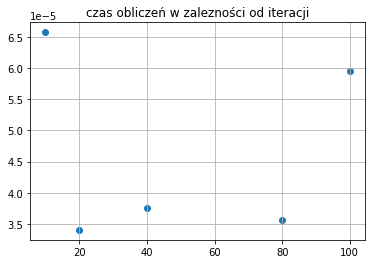

In [11]:
it = [10, 20, 40, 80, 100]
blad = []
t = []
for i in it:
    t1 = %timeit -r 3 -n 5 -o x_zer = main.newton(main.fun, main.dfun, main.ddfun, 0, 1, 10e-10, 1)
    t.append(t1.average)
    blad.append(t1.stdev)

plt.scatter(it, t)
plt.title("czas obliczeń w zalezności od iteracji")
plt.grid()
plt.show()